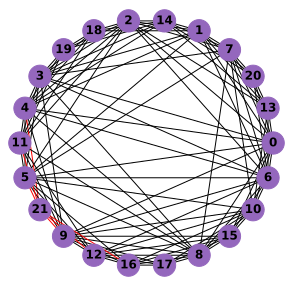

In [1]:
from matplotlib import pyplot as plt, animation
import networkx as nx
import random
import numpy as np

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

# parameters to change
m = 6
nodes_to_add = 15
fps = 1
filename = 'ani.gif'

fig = plt.figure(figsize=(5,5), dpi=300)
G = nx.complete_graph(m + 1)
pi_rads = [2 * i / (m + 1) for i in range(m+1)]
circ = list(range(m+1))

def pi_rad_to_xy(pi_rad):
    return np.cos(np.pi * pi_rad), np.sin(np.pi * pi_rad)

def add_node(m):
    new_node = nx.number_of_nodes(G)
    idx = random.randint(0, new_node - 1)
    link = (circ[idx - 1], circ[idx])
    G.add_node(new_node)
    
    lo = (idx - m//2) % len(circ)
    hi = (idx + m//2) % len(circ)
    
    if hi < lo:
        m_neighbors = circ[lo:]
        m_neighbors.extend(circ[:hi])
    else:
        m_neighbors = circ[lo:hi]
    
    for node in m_neighbors:
        G.add_edge(new_node, node)
        
    circ.insert(idx, new_node)
    mean = (pi_rads[idx - 1] + pi_rads[idx]) / 2
    if pi_rads[idx] <= 0 and pi_rads[idx - 1] > 0:
        mean -= 1
    pi_rads.insert(idx, mean)

flag = [0, False]
    
def animate(frame):
    fig.clear()
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    if flag[0] > 1:
        if flag[1]:
            flag[1] = False
            pi_rads_temp = [2 * i / nx.number_of_nodes(G) for i in range(nx.number_of_nodes(G))]
            for i, pi_rad in enumerate(pi_rads_temp):
                pi_rads[i] = pi_rad
        else:
            flag[1] = True
            add_node(m)
        edges = G.edges()
        colors = ['r'  if nx.number_of_nodes(G) - 1 in (u,v) else 'k' for u,v in edges]
    else:
        flag[0] = flag[0] + 1
        colors = ['k'] * (nx.number_of_nodes(G) - 1)
    
    pos = {node: pi_rad_to_xy(pi_rad) for node, pi_rad in zip(circ, pi_rads)}
    nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='C4', font_weight='bold', edge_color=colors)

ani = animation.FuncAnimation(fig, animate, frames=2 * nodes_to_add + 1, interval=1000 / fps, repeat=True)
ani.save(filename)